In [2]:
import numpy as np
import statsmodels.api as sm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=sm.datasets.macrodata.load_pandas().data

In [4]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [5]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [11]:
df.index=pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [12]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [13]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


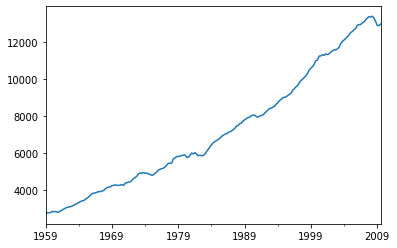

In [15]:
df['realgdp'].plot();

In [18]:
result=sm.tsa.filters.hpfilter(df['realgdp'])

In [19]:
result

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [21]:
result[0]

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [22]:
gdp_cycle, gdp_trend=sm.tsa.filters.hpfilter(df['realgdp'])

In [23]:
df['trend']=gdp_trend

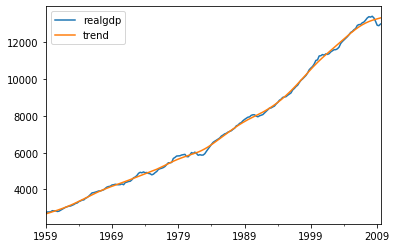

In [30]:
df[['realgdp','trend']].plot();

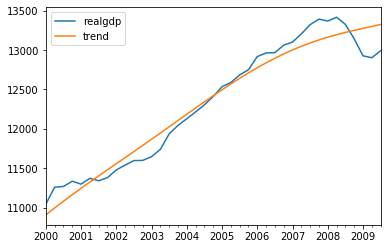

In [29]:
df[['realgdp','trend']]["2000.03.31":].plot();

In [25]:
df['cycle']=gdp_cycle

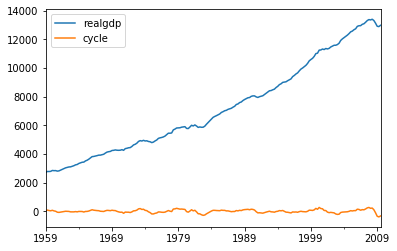

In [31]:
df[['realgdp','cycle']].plot();

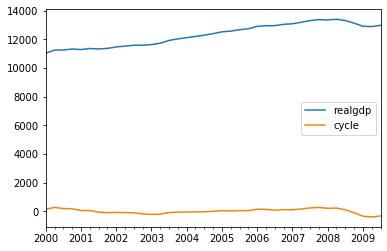

In [32]:
df[['realgdp','cycle']]["2000.03.31":].plot();

In [4]:
airline=pd.read_csv('airline_passengers.csv',index_col="Month")

In [5]:
airline.dropna(inplace=True)

In [37]:
airline.index=pd.to_datetime(airline.index)

In [6]:
airline

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [7]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [41]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [52]:
airline['5-month-SMA']=airline['Thousands of Passengers'].rolling(window=5).mean()

In [53]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()

In [54]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

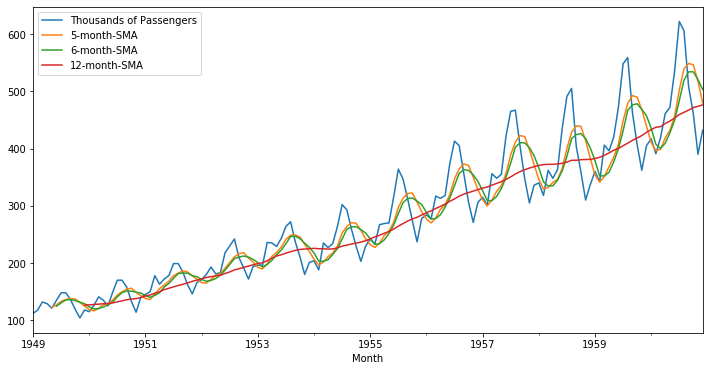

In [55]:
airline.plot(figsize=(12,6));

In [56]:
airline['EWMA-12']=airline['Thousands of Passengers'].ewm(span=12).mean()

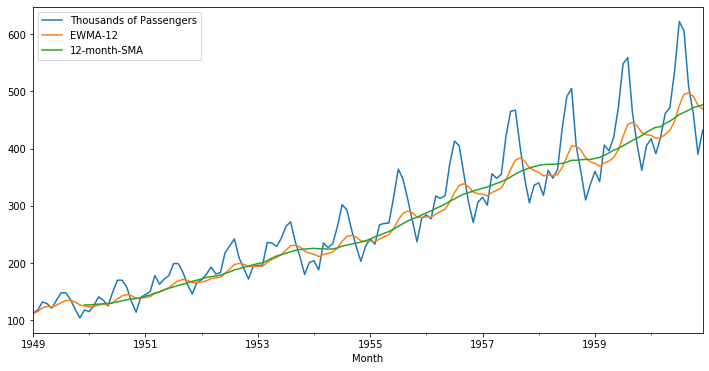

In [58]:
airline[['Thousands of Passengers','EWMA-12','12-month-SMA']].plot(figsize=(12,6));

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
result=seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

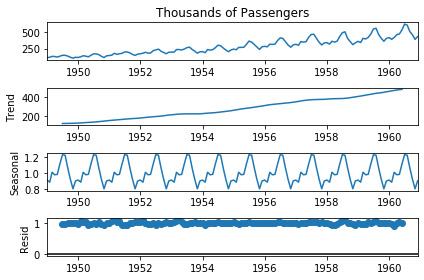

In [71]:
fig=result.plot()

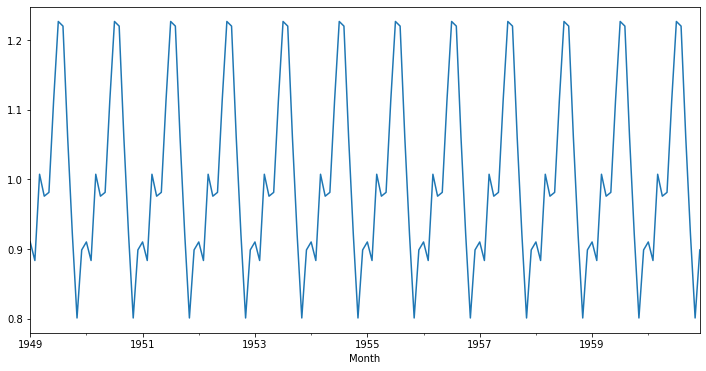

In [69]:
result.seasonal.plot(figsize=(12,6));#figsize=(12,6));

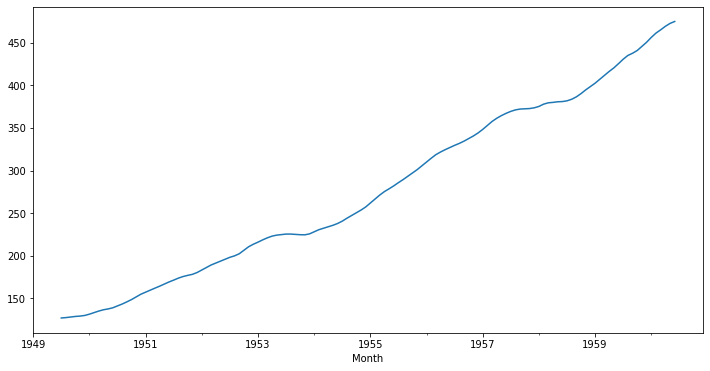

In [70]:
result.trend.plot(figsize=(12,6));#figsize=(12,6));

In [114]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')

In [115]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [116]:
df.columns=['Month','Milk in Pounds per Cow']

In [117]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [118]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [241]:
df

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,NaN
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,NaN
1975-10-01,827.0,10.0,51.0,15.0,13.0,NaN


In [119]:
df.drop(168,axis=0,inplace=True)

In [102]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [120]:
df['Month']=pd.to_datetime(df['Month'])

In [121]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [122]:
df.set_index('Month',inplace=True)

In [123]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [124]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [125]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


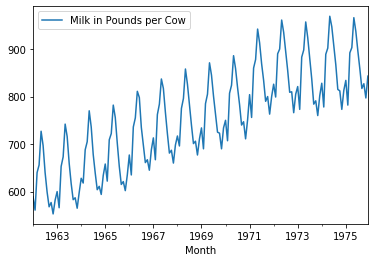

In [126]:
#Visualize data

df.plot();

In [127]:
time_series=df['Milk in Pounds per Cow']

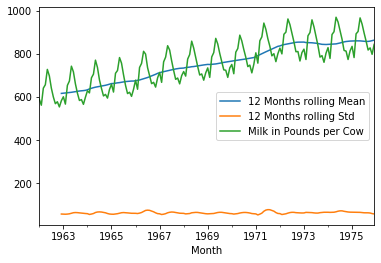

In [132]:
time_series.rolling(12).mean().plot(label='12 Months rolling Mean')
time_series.rolling(12).std().plot(label='12 Months rolling Std')
time_series.plot();
plt.legend();

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [134]:
decomp=seasonal_decompose(time_series)

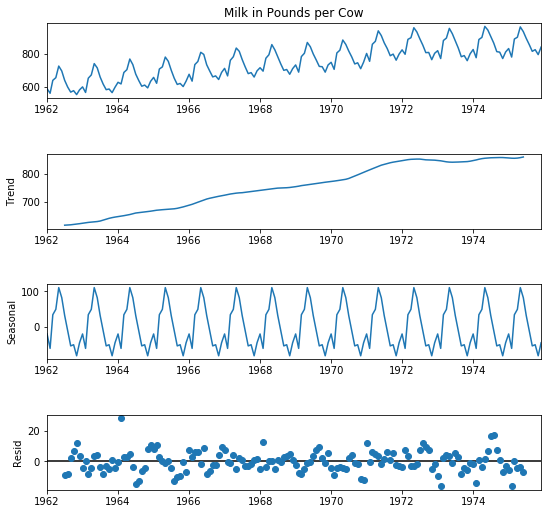

In [139]:
figx=decomp.plot()
figx.set_size_inches(8,8)

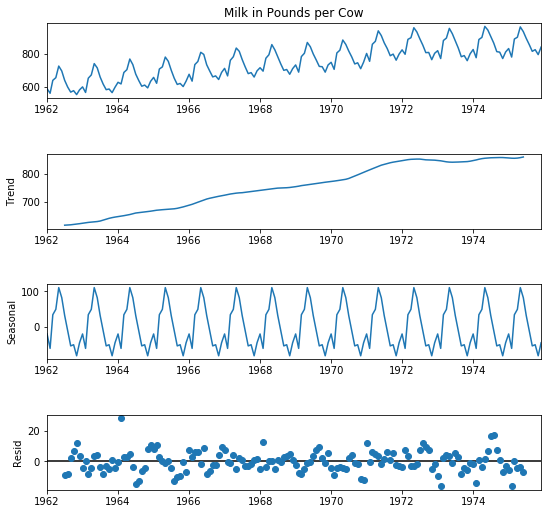

In [141]:
decomp=seasonal_decompose(time_series,period=12)
figy=decomp.plot()
figy.set_size_inches(8,8)

In [142]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [143]:
from statsmodels.tsa.stattools import adfuller

In [144]:
result=adfuller(df['Milk in Pounds per Cow'])

In [146]:
result

(-1.303811587422133,
 0.6274267086030301,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [153]:
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels=['ADF Test Statistic','p-value','nbr of lags','Nbr of used Observations']
    
    for value,label in zip(result,labels):
        print(label+ ":"+str(value))
    
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root & is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root & is non-stationary')

In [155]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic:-1.303811587422133
p-value:0.6274267086030301
nbr of lags:13
Nbr of used Observations:154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root & is non-stationary


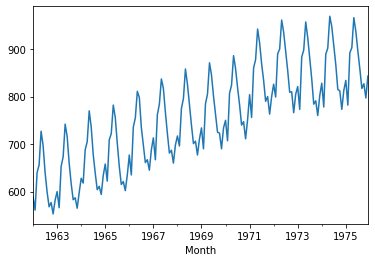

In [159]:
df['Milk in Pounds per Cow'].plot();

In [160]:
df['First Difference']=df['Milk in Pounds per Cow']-df['Milk in Pounds per Cow'].shift(1)

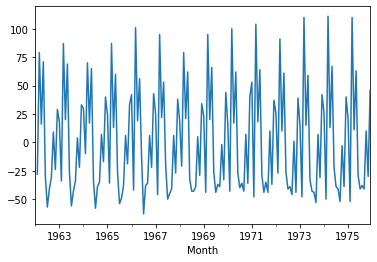

In [161]:
df['First Difference'].plot();

In [164]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-3.054995558653075
p-value:0.030068004001785248
nbr of lags:14
Nbr of used Observations:152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [165]:
df['Second Difference']=df['First Difference']-df['First Difference'].shift(1)

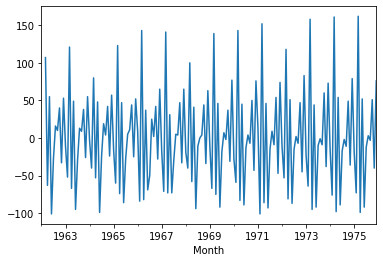

In [166]:
df['Second Difference'].plot();

In [167]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-14.327873645603434
p-value:1.1126989332079236e-26
nbr of lags:11
Nbr of used Observations:154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [168]:
df['Seasonal Difference']=df['Milk in Pounds per Cow']-df['Milk in Pounds per Cow'].shift(12)

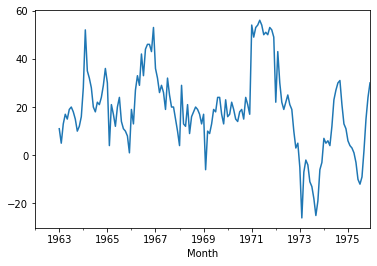

In [169]:
df['Seasonal Difference'].plot();

In [171]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-2.3354193143593975
p-value:0.16079880527711365
nbr of lags:12
Nbr of used Observations:143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root & is non-stationary


In [172]:
df['Seasonal First Difference']=df['First Difference']-df['First Difference'].shift(12)

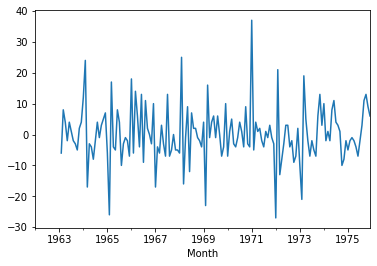

In [176]:
df['Seasonal First Difference'].plot();

In [174]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic:-5.038002274921982
p-value:1.865423431878848e-05
nbr of lags:11
Nbr of used Observations:143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root & is stationary


In [179]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

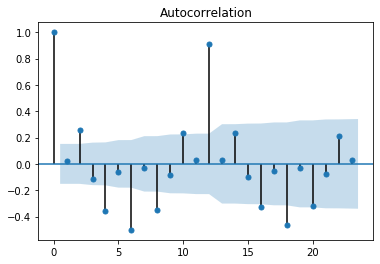

In [190]:
fig_FirstDiff=plot_acf(df['First Difference'].dropna());

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


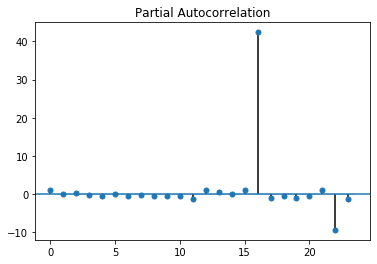

In [195]:
fig_FirstDiff=plot_pacf(df['First Difference'].dropna());

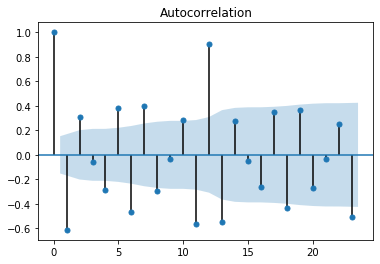

In [189]:
fig_SecDiff=plot_acf(df['Second Difference'].dropna());

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


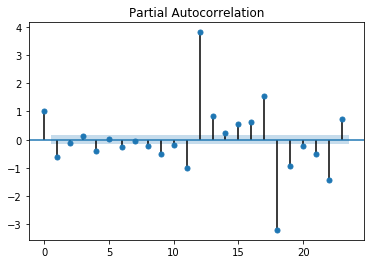

In [196]:
fig_SecDiff=plot_pacf(df['Second Difference'].dropna());

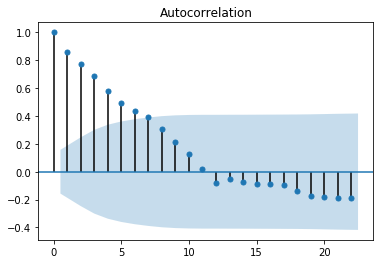

In [193]:
fig_SeasDiff=plot_acf(df['Seasonal Difference'].dropna());

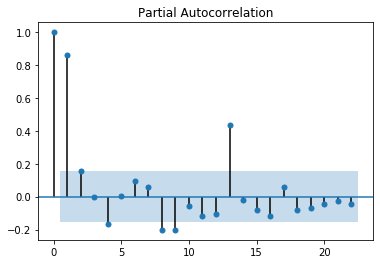

In [194]:
fig_SeasDiff=plot_pacf(df['Seasonal Difference'].dropna());

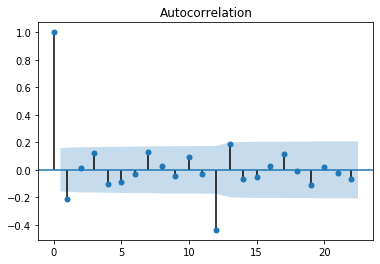

In [187]:
fig_SeasFirstDiff=plot_acf(df['Seasonal First Difference'].dropna());

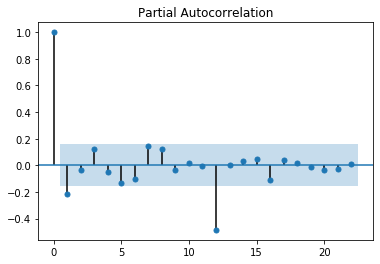

In [192]:
fig_SeasFirstDiff=plot_pacf(df['Seasonal First Difference'].dropna());

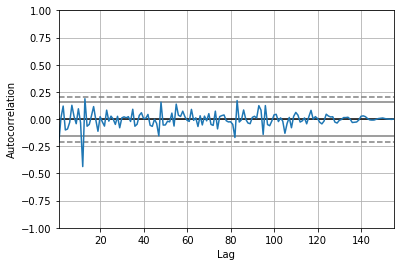

In [191]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Seasonal First Difference'].dropna());

In [197]:
from statsmodels.tsa.arima_model import ARIMA

In [202]:
model=sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [204]:
results=model.fit()

In [207]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 07 Apr 2020   AIC                           1074.131
Time:                                      22:18:36   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

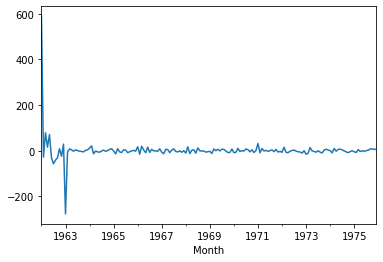

In [210]:
results.resid.plot();

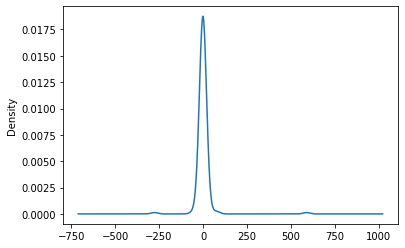

In [211]:
results.resid.plot(kind='kde');

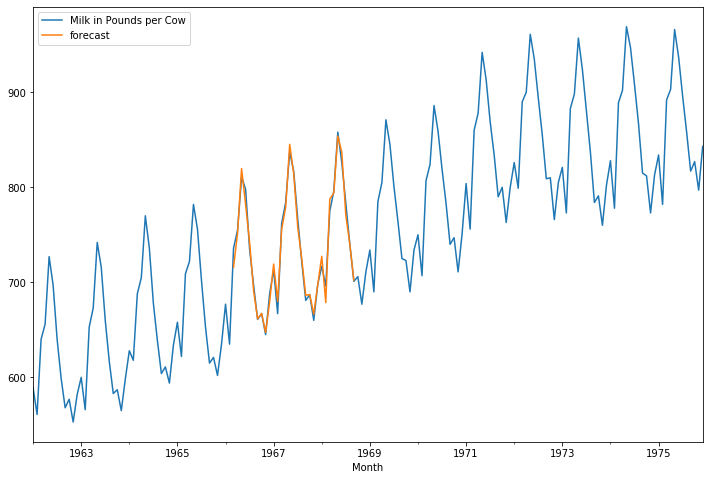

In [216]:
df['forecast']=results.predict(start=50,end=80)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8));

In [217]:
from pandas.tseries.offsets import DateOffset

In [219]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(1,24)]

In [220]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [222]:
future_df=pd.DataFrame(index=future_dates,columns=df.columns)

In [223]:
future_df

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
final_df=pd.concat([df,future_df])

In [226]:
final_df.head()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [227]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
final_df['forecast']=results.predict(start=168,end=192)

In [229]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525866
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918956
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027294
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962995


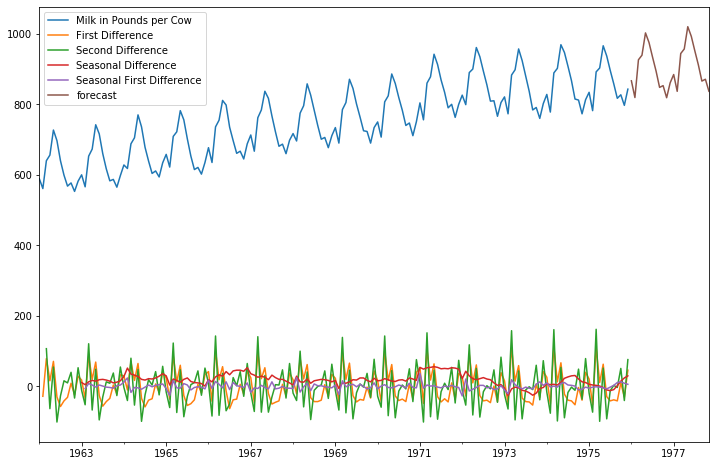

In [237]:
final_df.plot(figsize=(12,8));

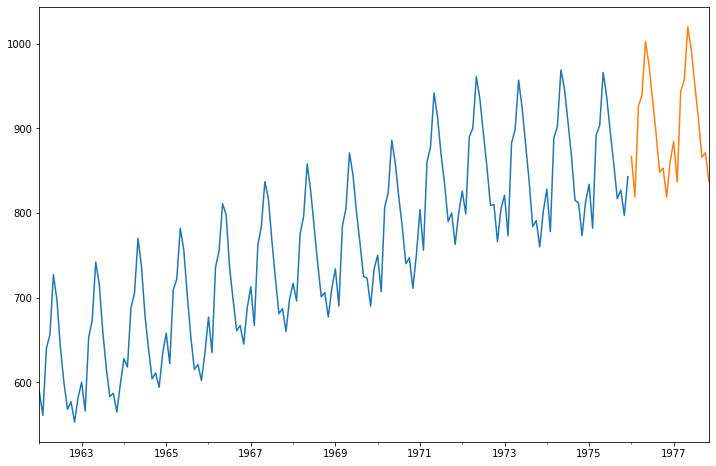

In [238]:
final_df['Milk in Pounds per Cow'].plot(figsize=(12,8));
final_df['forecast'].plot(figsize=(12,8));

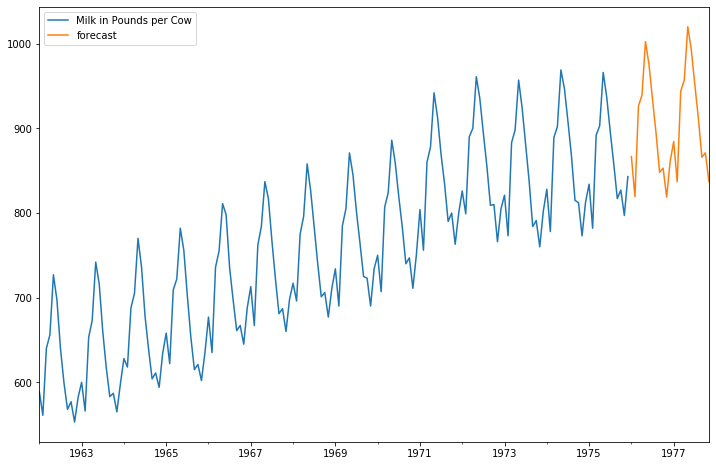

In [240]:
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8));